FINBENCH EDA

IMPORT DEPENDENCES AND LOAD THE DATA

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

df = pd.read_json("hf://datasets/PatronusAI/financebench/financebench_merged.jsonl", lines=True)

COLUMNS IDENTIFICATIONS

In [55]:
cat_cols = df.select_dtypes(include=['object']).columns
clean_cols = [col for col in cat_cols if not isinstance(df[col].dropna().iloc[0], list)]

print("Dataset Informations",df.info())
print(f"\nUnique values in Metadata:\n{df[clean_cols].nunique()}")
print("\nSearch null Values:\n",df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   financebench_id       150 non-null    object
 1   company               150 non-null    object
 2   doc_name              150 non-null    object
 3   question_type         150 non-null    object
 4   question_reasoning    100 non-null    object
 5   domain_question_num   50 non-null     object
 6   question              150 non-null    object
 7   answer                150 non-null    object
 8   justification         100 non-null    object
 9   dataset_subset_label  150 non-null    object
 10  evidence              150 non-null    object
 11  gics_sector           150 non-null    object
 12  doc_type              150 non-null    object
 13  doc_period            150 non-null    int64 
 14  doc_link              150 non-null    object
 15  answer_length         150 non-null    in

In [63]:
# Mencari nilai evidence dari setiap company
print("Jumlah pertanyaan")
print(df['company'].value_counts(),"\n")

print("Jumlah isi evidence")
evidence_flat = df[['company', 'evidence']].explode('evidence')
print(evidence_flat['company'].value_counts())


Jumlah pertanyaan
company
PepsiCo                 11
Amcor                    9
Johnson & Johnson        9
3M                       8
Boeing                   8
Best Buy                 8
AMD                      8
American Express         7
MGM Resorts              7
Pfizer                   6
Ulta Beauty              6
Verizon                  5
Adobe                    5
JPMorgan                 5
Corning                  4
CVS Health               4
Nike                     4
General Mills            4
American Water Works     3
Walmart                  3
Amazon                   3
AES Corporation          3
Block                    3
Coca-Cola                3
Lockheed Martin          3
Activision Blizzard      2
Netflix                  2
Foot Locker              2
Microsoft                2
Costco                   1
Kraft Heinz              1
Paypal                   1
Name: count, dtype: int64 

Jumlah evidence
company
PepsiCo                 14
3M                      10
John

ANALYZING SECTOR DISTRIBUTIONS

/tmp/ipython-input-3719940260.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='question_type', ax=axes[0], palette='viridis')
/tmp/ipython-input-3719940260.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sectors.values, y=top_sectors.index, ax=axes[1], palette='magma')
/tmp/ipython-input-3719940260.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='question_reasoning', ax=axes[2], palette='coolwarm')


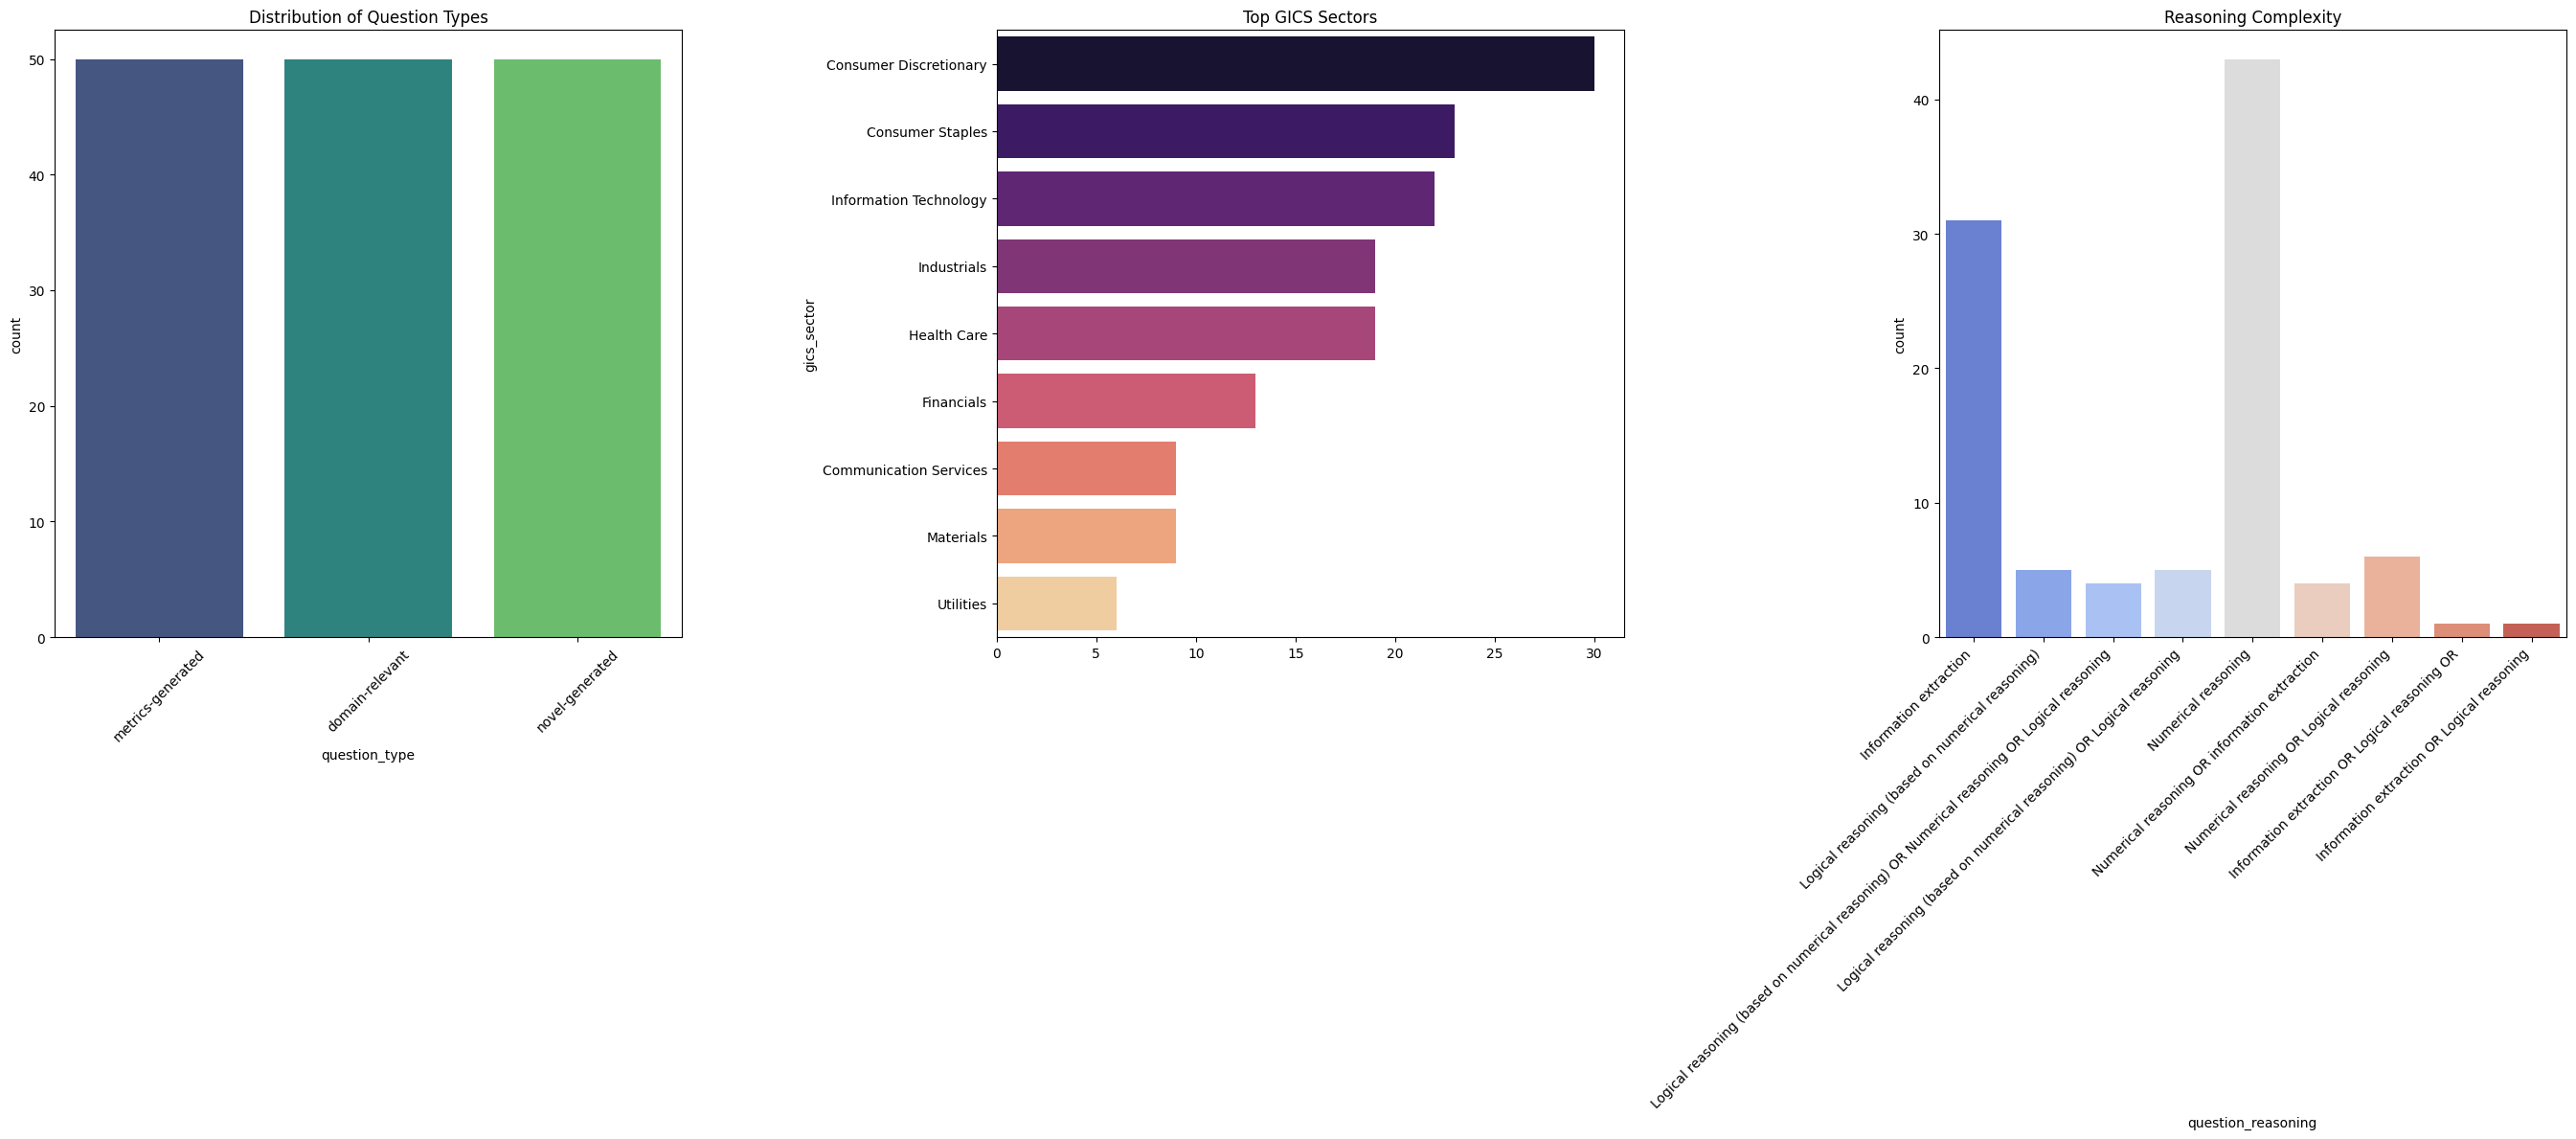

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(27, 12))

# Question Type
sns.countplot(data=df, x='question_type', ax=axes[0], palette='viridis')
axes[0].set_title('Distribution of Question Types')
axes[0].tick_params(axis='x', rotation=45)

# GICS Sectors
top_sectors = df['gics_sector'].value_counts()
sns.barplot(x=top_sectors.values, y=top_sectors.index, ax=axes[1], palette='magma')
axes[1].set_title('Top GICS Sectors')

# Reasoning vs Non-Reasoning
sns.countplot(data=df, x='question_reasoning', ax=axes[2], palette='coolwarm')
plt.xticks(rotation=45, ha='right')
axes[2].set_title('Reasoning Complexity')

plt.tight_layout()
plt.show()

Statistik Panjang Token per Bukti:
count     189.000000
mean     1093.748677
std       431.823485
min       385.250000
25%       796.500000
50%      1032.500000
75%      1296.500000
max      3314.250000
Name: est_tokens, dtype: float64 

     company  est_tokens
0         3M     1640.75
1         3M     1296.75
2         3M      454.25
2         3M      804.00
2         3M     1022.50
..       ...         ...
147  Walmart      835.25
147  Walmart     1038.75
148  Walmart      850.25
149  Walmart      864.25
149  Walmart     1463.25

[189 rows x 2 columns]


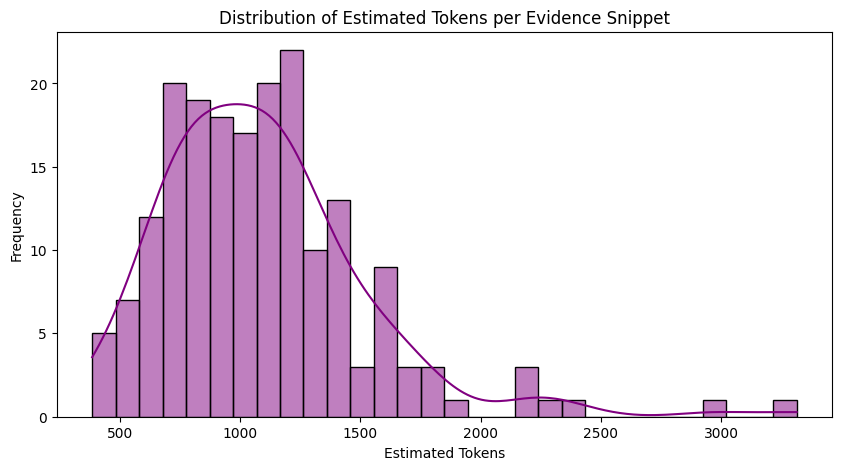

In [82]:
evidence_flat['char_length'] = evidence_flat['evidence'].astype(str).str.len()

# 2. Estimasi jumlah token (asumsi 1 token = 4 karakter)
evidence_flat['est_tokens'] = evidence_flat['char_length'] / 4

# 3. Lihat statistiknya
print("Statistik Panjang Token per Bukti:")
print(evidence_flat['est_tokens'].describe(),"\n")
print(evidence_flat[['company','est_tokens']])
plt.figure(figsize=(10, 5))
sns.histplot(evidence_flat['est_tokens'], bins=30, kde=True, color='purple')
plt.title('Distribution of Estimated Tokens per Evidence Snippet')
plt.xlabel('Estimated Tokens')
plt.ylabel('Frequency')
plt.show()